# Projet 211 optimisation paramétrique

In [138]:
#inclusion des librairies
import matplotlib.pyplot as plt
import numpy as np 
import xlrd as xlc
from mpl_toolkits.mplot3d import Axes3D
from scipy import misc
import math

In [139]:
#Initialisation des vitesses et debit souhaité
Vitesse_leger = np.linspace(40,150,100)
Vitesse_lourd = np.linspace(10,120,100)
Debit = 150

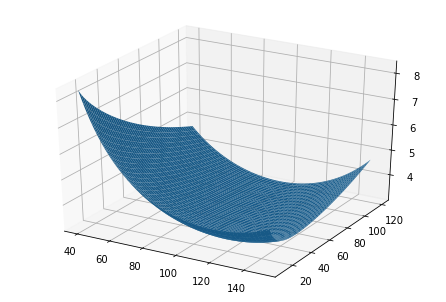

In [140]:
#Equation, critère
ax = Axes3D(plt.figure())
X, Y = np.meshgrid(Vitesse_leger,Vitesse_lourd)

def f2(vitesse_leger,vitesse_lourd) :
    critere_partie_1 = (np.exp(0.3734+0.06*(0.75*vitesse_leger/2+ 0.25*vitesse_lourd/2))-30)/30 #Nombre de mort
    critere_partie_2 = Debit/((80*vitesse_leger/100) + (20*vitesse_lourd/100)) #Debit
    critere = critere_partie_1 + 2*critere_partie_2 + 0.1*vitesse_leger/vitesse_lourd
    return critere 

def f3(x,y):
    return x**4 + y**4 - (x-y)**2
f=f2

Z = f(X,Y)
ax.plot_surface(X,Y,Z)
plt.show()

In [141]:
def derivee_partielle(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return misc.derivative(wraps, point[var], dx = 1e-6)


In [142]:
#Constantes de résolution
ALPHA = 100 # coefficient
MAXITER = 10000 # Nb max d'iteration
EPSILON = 0.000001 # scondition d'arret

#Conditions initiales
x_precedent = 50 
y_precedent = 90
z_precedent = f(x_precedent,y_precedent)

nb_iter = 0 
z = z_precedent-1



2767


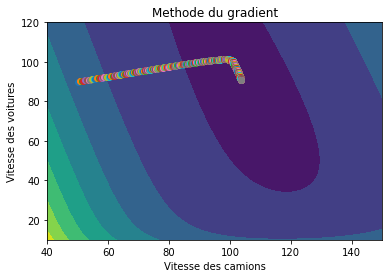

In [137]:
#Initialisation de l'affichage
plt.contourf(X,Y,f(X,Y))
plt.scatter(x_precedent,y_precedent)

#Boucle de résolution / Algorythme du gradient descendant
while abs( z_precedent - z ) > EPSILON and nb_iter < MAXITER:
    nb_iter += 1

    x = x_precedent - ALPHA * derivee_partielle(f, 0, [x_precedent,y_precedent])
    y = y_precedent - ALPHA * derivee_partielle(f, 1, [x_precedent,y_precedent])
    
    x_precedent = x
    y_precedent = y
    z_precedent = z
    
    z = f(x,y)
    plt.scatter(x, y)

#Affichage du résultat
print(nb_iter)
plt.title("Methode du gradient")
plt.xlabel("Vitesse des camions")
plt.ylabel("Vitesse des voitures")
plt.show()
print("La vitesse optimale est de ",y," pour les voitures et ",x," pour les camions")